In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from plotting_tools import * 
import geopandas as gpd

In [2]:
%config InlineBackend.print_figure_kwargs = {'dpi': 110, 'bbox_inches': 'tight'}

In [8]:
household_data = pd.read_csv("../../preprocessing/preprocessed_data/pop8/locs_per_ww_areas.csv")

In [9]:
household_data

,Area,Total,Home,School,Work,Recreation,Shop,Hospital,ICU,Cemetery,1-Person HH,2-Person HH,5-Person HH,3-Person HH,4-Person HH,6-Person HH,7-Person HH
0,58,1540,1453,6,70,9,2,0,0,0,860,330,17,161,83,2,0
1,59,467,398,5,53,9,2,0,0,0,221,85,2,69,20,1,0
2,60,5272,4966,19,180,63,44,0,0,0,2962,1158,72,447,305,15,7
3,213,1743,1615,6,84,30,8,0,0,0,963,370,22,142,109,7,2
4,96,1670,1558,8,75,22,7,0,0,0,983,358,12,130,72,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,49,1746,1552,7,109,36,42,0,0,0,948,338,14,142,106,3,1
231,131,2909,2519,7,98,255,29,1,0,0,1511,590,36,230,146,3,3
232,132,2863,2505,4,105,223,25,0,1,0,1475,611,26,244,143,4,2
233,50,2937,2545,11,107,253,19,1,1,0,1529,608,36,203,161,8,0


In [10]:
household_data["households"] = household_data["1-Person HH"] + household_data["2-Person HH"] + household_data["3-Person HH"] + household_data["4-Person HH"] + household_data["5-Person HH"] + household_data["6-Person HH"] + household_data["7-Person HH"]

In [11]:
household_data.head()

,Area,Total,Home,School,Work,Recreation,Shop,Hospital,ICU,Cemetery,1-Person HH,2-Person HH,5-Person HH,3-Person HH,4-Person HH,6-Person HH,7-Person HH,households
0,58,1540,1453,6,70,9,2,0,0,0,860,330,17,161,83,2,0,1453
1,59,467,398,5,53,9,2,0,0,0,221,85,2,69,20,1,0,398
2,60,5272,4966,19,180,63,44,0,0,0,2962,1158,72,447,305,15,7,4966
3,213,1743,1615,6,84,30,8,0,0,0,963,370,22,142,109,7,2,1615
4,96,1670,1558,8,75,22,7,0,0,0,983,358,12,130,72,2,1,1558


In [13]:
household_data.loc[household_data.Area.isin([234, 64])]

,Area,Total,Home,School,Work,Recreation,Shop,Hospital,ICU,Cemetery,1-Person HH,2-Person HH,5-Person HH,3-Person HH,4-Person HH,6-Person HH,7-Person HH,households
14,64,4552,4351,14,95,81,11,0,0,0,2671,985,38,378,262,9,8,4351
15,234,4466,4282,9,92,73,10,0,0,0,2521,1011,57,392,285,10,6,4282


In [24]:
fractions = household_data.iloc[:,10:17].apply(lambda x: x / household_data["households"], axis=0)
fractions["Area"] = household_data["Area"]

In [25]:
fractions.loc[fractions.Area.isin([234, 64])]

,1-Person HH,2-Person HH,5-Person HH,3-Person HH,4-Person HH,6-Person HH,7-Person HH,Area
14,0.613882,0.226385,0.008734,0.086877,0.060216,0.002068,0.001839,64
15,0.588744,0.236105,0.013312,0.091546,0.066558,0.002335,0.001401,234


In [28]:
fractions.sort_values(by="7-Person HH", ascending=False).head(10)

,1-Person HH,2-Person HH,5-Person HH,3-Person HH,4-Person HH,6-Person HH,7-Person HH,Area
5,0.637351,0.220413,0.011944,0.074919,0.048860,0.002172,0.004343,97
10,0.612857,0.220000,0.012857,0.084286,0.067143,0.000000,0.002857,62
6,0.603985,0.231880,0.009465,0.092403,0.058281,0.001993,0.001993,98
20,0.592317,0.243434,0.010192,0.087809,0.063113,0.001176,0.001960,224
166,0.588516,0.245720,0.010401,0.093608,0.058505,0.001300,0.001950,20
144,0.601163,0.243023,0.009690,0.090310,0.051938,0.001938,0.001938,176
149,0.615868,0.217707,0.007741,0.086115,0.068699,0.001935,0.001935,14
201,0.589269,0.243373,0.012775,0.087193,0.063558,0.001916,0.001916,37
14,0.613882,0.226385,0.008734,0.086877,0.060216,0.002068,0.001839,64
167,0.581395,0.247258,0.012286,0.093901,0.061430,0.001975,0.001755,196


In [26]:
fractions.describe()

,1-Person HH,2-Person HH,5-Person HH,3-Person HH,4-Person HH,6-Person HH,7-Person HH,Area
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,0.596511,0.236247,0.011582,0.090270,0.062514,0.002064,0.000811,121.876596
std,0.010574,0.008928,0.001954,0.007947,0.004454,0.000921,0.000566,69.263816
min,0.535930,0.206211,0.005005,0.066236,0.046213,0.000000,0.000000,1.000000
25%,0.592285,0.231821,0.010383,0.086782,0.059536,0.001482,0.000464,62.500000
50%,0.596703,0.236088,0.011553,0.089574,0.062542,0.002026,0.000714,121.000000
75%,0.602535,0.240697,0.012750,0.093320,0.065125,0.002515,0.001155,181.500000
max,0.637351,0.279483,0.019199,0.173367,0.079251,0.005663,0.004343,243.000000


In [3]:
gebiete = gpd.read_file("MunichModel_shape/Gebiete.shp")
abschnitte = gpd.read_file("MunichModel_shape/Abschnitte.shp")
knoten = gpd.read_file("MunichModel_shape/Knoten.shp")

In [4]:
knoten["clear_name"] = ["Schmidbartlangerstr.", 
                  "Schenkendorfstr.", 
                  "Botanischer\nGarten", 
                  "Gräfelfinger\nStr.", #3
                  "Am\nLangwieder\nBach", #4
                  "Neue\nMessstelle 2", 
                  "WWT Gut Großlappen", 
                  "Gyßlinger Becken", #7
                  "Neue\nMessstelle 1", 
                  "WWT Gut Marienhof", #9
                  "Gesamt",
                  "Leopoldstr.", #11
                  "Neue\nMessstelle 4", 
                  "Zulauf\nGut Großlappen", 
                  "Savitstr.",
                  "Wintersteinstr.", ]

knoten["name"] = knoten.clear_name.apply(lambda x: manhole_clear_names[x])

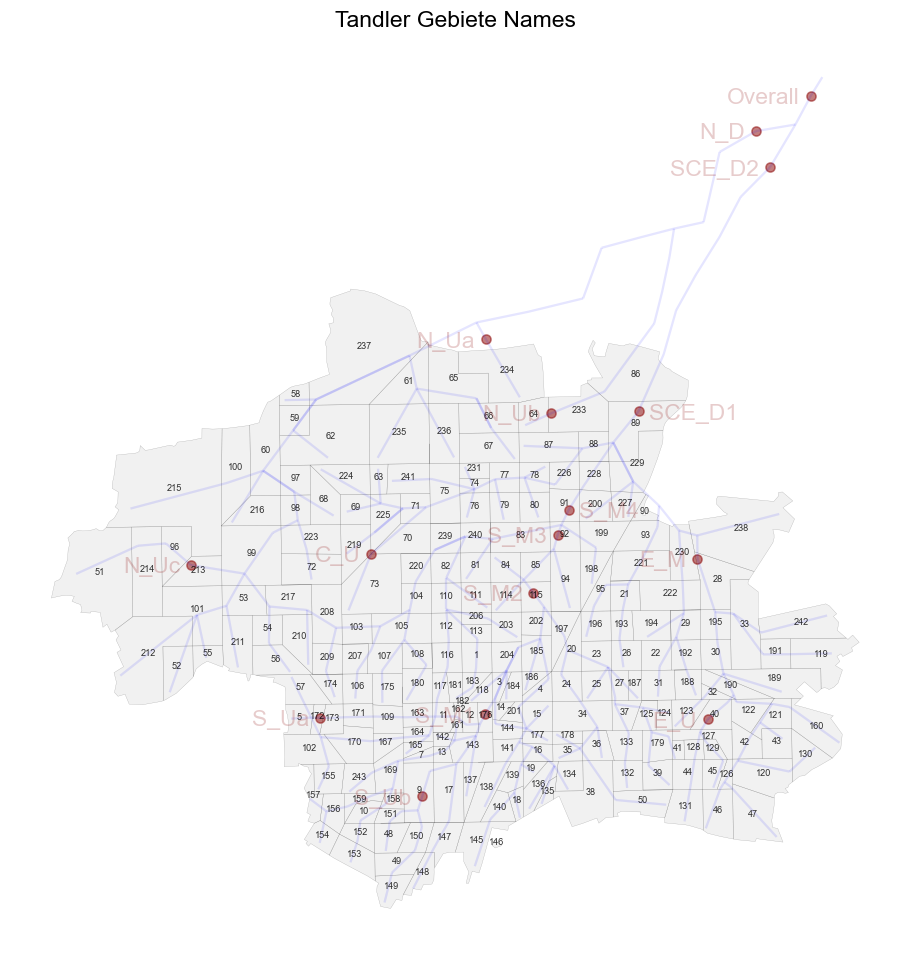

In [6]:
fig, ax = plt.subplots(figsize=(10, 9), dpi=300)

# Plot the layers
gebiete.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.2, label='Gebiete', alpha=0.3)
knoten.plot(ax=ax, color='darkred', label='sampling station', alpha=0.5)
abschnitte.plot(ax=ax, color='blue', label='pipe', alpha=0.1)

# Annotate each Gebiet with its name at the centroid
for idx, row in gebiete.iterrows():
    centroid = row.geometry.centroid
    name = row['Name']  

    ax.annotate(
        text=name,
        xy=(centroid.x, centroid.y),
        ha='center',
        fontsize=6,
        color='black',
        alpha=0.8
    )


txt_color = "darkred"

# orientation left of point
for idx, row in knoten.iloc[[0,2,3,4,5,6,7,8,9,10,11,12,14,15]].iterrows():
    ax.annotate(text=row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(-7, -5), textcoords="offset points", ha="right", color=txt_color, alpha=0.2)

# orientation right of point
for idx, row in knoten.iloc[[1,13]].iterrows():
    ax.annotate(text=row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(7, -5), textcoords="offset points", color=txt_color, alpha=0.2)

# Optional: improve layout
ax.set_axis_off()
ax.set_title("Tandler Gebiete Names")

plt.tight_layout()

plt.show()

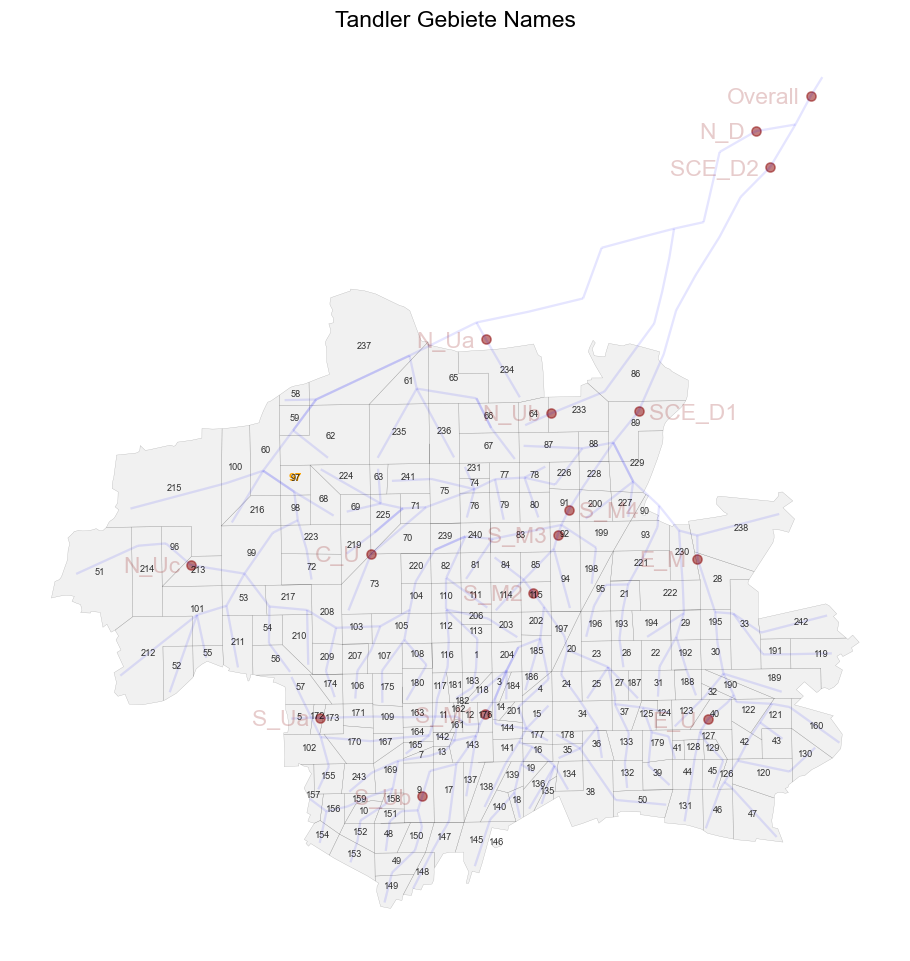

In [29]:
fig, ax = plt.subplots(figsize=(10, 9), dpi=300)

# Plot the layers
gebiete.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.2, label='Gebiete', alpha=0.3)
knoten.plot(ax=ax, color='darkred', label='sampling station', alpha=0.5)
abschnitte.plot(ax=ax, color='blue', label='pipe', alpha=0.1)

# Annotate each Gebiet with its name at the centroid
for idx, row in gebiete.iterrows():
    centroid = row.geometry.centroid
    name = row['Name']  
    # Highlight gebiete
    if str(row['Name']) in [str(x) for x in [97]]:
        ax.annotate(
            text=name,
            xy=(centroid.x, centroid.y),
            ha='center',
            fontsize=8,
            color='orange',
            fontweight='bold',
            alpha=1.0
        )
    ax.annotate(
        text=name,
        xy=(centroid.x, centroid.y),
        ha='center',
        fontsize=6,
        color='black',
        alpha=0.8
    )


txt_color = "darkred"

# orientation left of point
for idx, row in knoten.iloc[[0,2,3,4,5,6,7,8,9,10,11,12,14,15]].iterrows():
    ax.annotate(text=row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(-7, -5), textcoords="offset points", ha="right", color=txt_color, alpha=0.2)

# orientation right of point
for idx, row in knoten.iloc[[1,13]].iterrows():
    ax.annotate(text=row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(7, -5), textcoords="offset points", color=txt_color, alpha=0.2)

# Optional: improve layout
ax.set_axis_off()
ax.set_title("Tandler Gebiete Names")

plt.tight_layout()

plt.show()

In [14]:
df = household_data

In [16]:
df

,Area,Total,Home,School,Work,Recreation,Shop,Hospital,ICU,Cemetery,1-Person HH,2-Person HH,5-Person HH,3-Person HH,4-Person HH,6-Person HH,7-Person HH,households,frac7
0,58,1540,1453,6,70,9,2,0,0,0,860,330,17,161,83,2,0,1453,0.000000
1,59,467,398,5,53,9,2,0,0,0,221,85,2,69,20,1,0,398,0.000000
2,60,5272,4966,19,180,63,44,0,0,0,2962,1158,72,447,305,15,7,4966,0.001410
3,213,1743,1615,6,84,30,8,0,0,0,963,370,22,142,109,7,2,1615,0.001238
4,96,1670,1558,8,75,22,7,0,0,0,983,358,12,130,72,2,1,1558,0.000642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,49,1746,1552,7,109,36,42,0,0,0,948,338,14,142,106,3,1,1552,0.000644
231,131,2909,2519,7,98,255,29,1,0,0,1511,590,36,230,146,3,3,2519,0.001191
232,132,2863,2505,4,105,223,25,0,1,0,1475,611,26,244,143,4,2,2505,0.000798
233,50,2937,2545,11,107,253,19,1,1,0,1529,608,36,203,161,8,0,2545,0.000000


In [17]:
gebiete

,Name,id_n,id,geometry
0,201,91620821,4947,"POLYGON ((690550.062 5332480.949, 691069.156 5..."
1,221,91620421,4646,"POLYGON ((696263.806 5337159.535, 694264.699 5..."
2,222,91620891,4954,"POLYGON ((697263.369 5337171.641, 697276.083 5..."
3,29,91620971,4962,"POLYGON ((696289.237 5335158.663, 696276.523 5..."
4,142,91620811,4946,"POLYGON ((688874.057 5331599.98, 688353.138 53..."
...,...,...,...,...
230,224,91620151,4617,"POLYGON ((685230.745 5340027.046, 684218.487 5..."
231,184,91620711,4936,"POLYGON ((691304.255 5334097.645, 691314.444 5..."
232,120,91621151,4981,"POLYGON ((700338.294 5331205.171, 700348.308 5..."
233,240,91620281,4630,"POLYGON ((690241.081 5339087.558, 690253.815 5..."


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1) compute fraction in your table
# assuming your DataFrame is called df and has columns 'Area', '7-Person HH' and 'households'
df['frac7'] = df['7-Person HH'] / df['households']

# 2) merge into your GeoDataFrame (assuming the join field is 'Area')
gebiete = gebiete.merge(
    df[['Area', 'frac7']],
    on='Area',
    how='left'
)

# 3) plot, using 'frac7' to drive the fill color
fig, ax = plt.subplots(figsize=(10, 9), dpi=300)

# base layer in light grey
gebiete.plot(
    ax=ax,
    color='lightgrey',
    edgecolor='black',
    linewidth=0.2,
    alpha=0.3
)

# choropleth layer
gebiete.plot(
    column='frac7',
    ax=ax,
    cmap='OrRd',            # e.g. Orange–Red ramp; pick any matplotlib colormap you like
    linewidth=0.2,
    edgecolor='grey',
    legend=True,
    legend_kwds={
        'label': "Share of 7-person households",
        'shrink': 0.5
    },
    alpha=0.8
)

# then your other layers...
knoten.plot(ax=ax, color='darkred', label='sampling station', alpha=0.5)
abschnitte.plot(ax=ax, color='blue',        label='pipe',            alpha=0.1)

# annotations (you can leave these as-is)
for idx, row in gebiete.iterrows():
    centroid = row.geometry.centroid
    ax.annotate(
        text=row['Name'],
        xy=(centroid.x, centroid.y),
        ha='center',
        fontsize=6,
        color='black',
        alpha=0.8
    )

# ...and the knoten labels
txt_color = "darkred"
for idx, row in knoten.iloc[[0,2,3,4,5,6,7,8,9,10,11,12,14,15]].iterrows():
    ax.annotate(text=row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(-7, -5), textcoords="offset points", ha="right",
                color=txt_color, alpha=0.2)
for idx, row in knoten.iloc[[1,13]].iterrows():
    ax.annotate(text=row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(7, -5), textcoords="offset points",
                color=txt_color, alpha=0.2)

ax.set_axis_off()
ax.set_title("Tandler Gebiete: Fraction of 7-Person Households")

plt.tight_layout()
plt.show()


KeyError: 'Area'